In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.multicomp as multi
from dataFilter import Replacing

df = pd.read_excel("C:/Users/Админ/Documents/GitHub/DANO_NN_2024/Data/hakaton_nn_1month.xlsx")
#Replacing(df)


KeyboardInterrupt: 

In [7]:
df["offencedata"] = pd.to_datetime(df["offencedate"])
df["gender_cd"] = df["gender_cd"].replace("M",1)
df["gender_cd"] = df["gender_cd"].replace(";M",1)
df["gender_cd"] = df["gender_cd"].replace("F",0)
df["children_cnt"] = df["children_cnt"].fillna(0)



     offencedata  gender  children  auto_year car price  income   power   age  \
0     2024-05-15       1       0.0     2011.0       712    80.0  152.00  23.0   
1     2024-05-13       1       0.0     2011.0       162    45.0   73.00  19.0   
2     2024-05-10       1       0.0     2018.0      2601   500.0  145.00  43.0   
3     2024-05-02       1       0.0     2007.0       410    35.0  150.00  27.0   
4     2024-04-28       0       0.0     2004.0       617    50.0  155.00  42.0   
...          ...     ...       ...        ...       ...     ...     ...   ...   
7995  2024-05-08       0       0.0     2016.0       917    39.0  110.00  58.0   
7996  2024-05-15       1       0.0     1999.0       549   100.0  156.00  36.0   
7997  2024-05-24       1       0.0     2004.0       552   110.0  163.00  35.0   
7998  2024-05-11       1       0.0     2013.0      1424     NaN  148.00  33.0   
7999  2024-05-09       1       0.0     2019.0      1915    50.0  150.00  26.0   

     martial_status educati

<Figure size 1000x800 with 0 Axes>

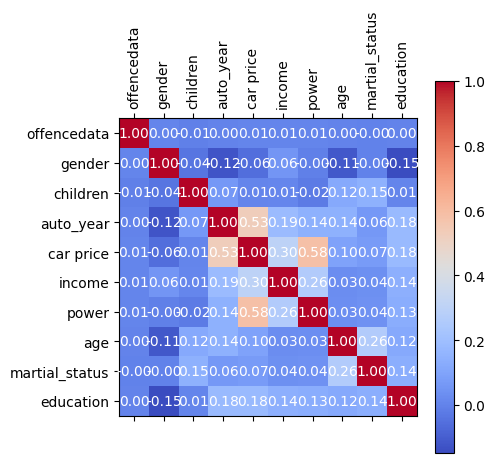

In [48]:
df["offencedata"] = pd.to_datetime(df["offencedate"])
df["gender_cd"] = df["gender_cd"].replace("M",1)
df["gender_cd"] = df["gender_cd"].replace(";M",1)
df["gender_cd"] = df["gender_cd"].replace("F",0)
df["gender_cd"] = df["gender_cd"].fillna(0)
df["children_cnt"] = df["children_cnt"].fillna(0)
df["gender_cd"] = df["gender_cd"].astype("int64")
df["gear_type"] = df["gear_type"].replace("Автоматическая",1)
df["gear_type"] = df["gear_type"].replace("Механическая",0)
df["education_level_cd"] = df["education_level_cd"].replace("SCH",0)
df["education_level_cd"] = df["education_level_cd"].replace("UGR",1)
df["education_level_cd"] = df["education_level_cd"].replace("GRD",2)
df["education_level_cd"] = df["education_level_cd"].replace("PGR",3)
df["education_level_cd"] = df["education_level_cd"].replace("ACD",4)
df["education_level_cd"] = df["education_level_cd"].replace("MGR",5)
df["education_level_cd"] = df["education_level_cd"].replace("AGR",6)
df["education_level_cd"] = df["education_level_cd"].replace("SPC",7)
df["marital_status_cd"] = df["marital_status_cd"].replace("MAR",2)
df["marital_status_cd"] = df["marital_status_cd"].replace("DIV",0)
df["marital_status_cd"] = df["marital_status_cd"].replace("UNM",-1)
df["marital_status_cd"] = df["marital_status_cd"].replace("WID",0)
df["marital_status_cd"] = df["marital_status_cd"].replace("CIV",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Движение по обочине",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Превышение скорости на 20-40 км/ч",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Превышение скорости на 40-60 км/ч",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Нарушение разметки",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Поворот (разворот) в запрещенном месте",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Не пристегнут ремень безопасности",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Проезд на красный сигнал светофора",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Движение по выделенной полосе (Москва и Санкт-Петербург)",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Движение по обочине",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Использование телефона за рулем",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Выезд на велосипедную или пешеходную дорожку",1)
df["offenceshortstatement"] = df["offenceshortstatement"].replace("Движение по выделенной полосе (Москва и Санкт-Петербург)",1)



data_to_corr = pd.DataFrame({"offencedata":df["offencedata"][:8000],
                             "gender":df["gender_cd"][:8000],
                             "children": df["children_cnt"][:8000],
                             "auto_year": df["auto_year"][:8000],
                             "car price": df["car_price"][:8000],
                             "income":df["person_monthly_income_amt"][:8000],
                             "power" : df["engine_power"][:8000],
                             "age": df["age"][:8000],
                             "martial_status":df["marital_status_cd"][:8000],
                             "education": df["education_level_cd"][:8000]})

print(data_to_corr)

corr_matrix = data_to_corr.corr()
plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, cmap="coolwarm")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns , rotation="vertical")
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="w")
 
plt.show()

<Axes: xlabel='region', ylabel='Count'>

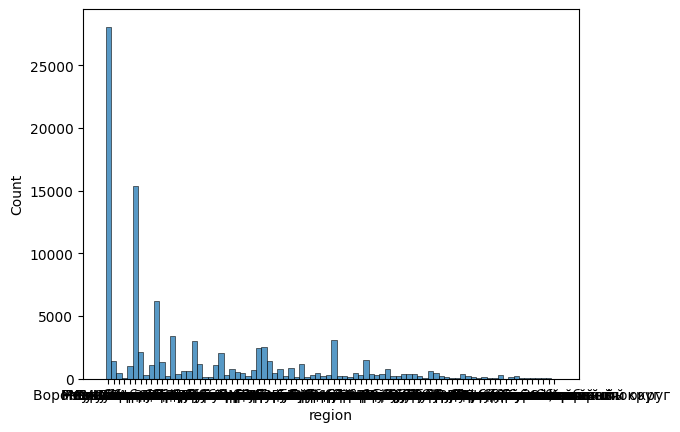

In [32]:
sns.histplot(df["region"])


<Axes: xlabel='day_of_week', ylabel='Count'>

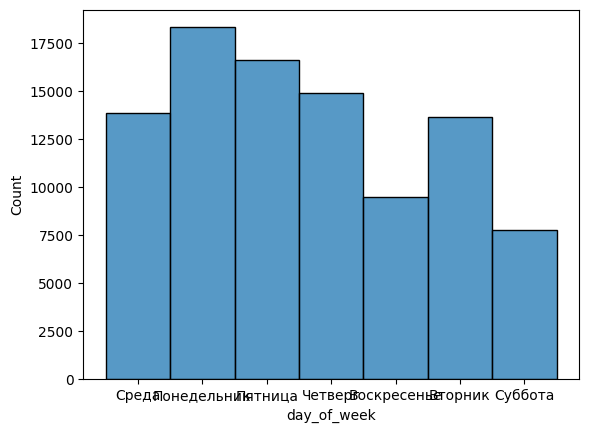

In [186]:
sns.histplot(df["day_of_week"])

<Axes: ylabel='offenceshortstatement'>

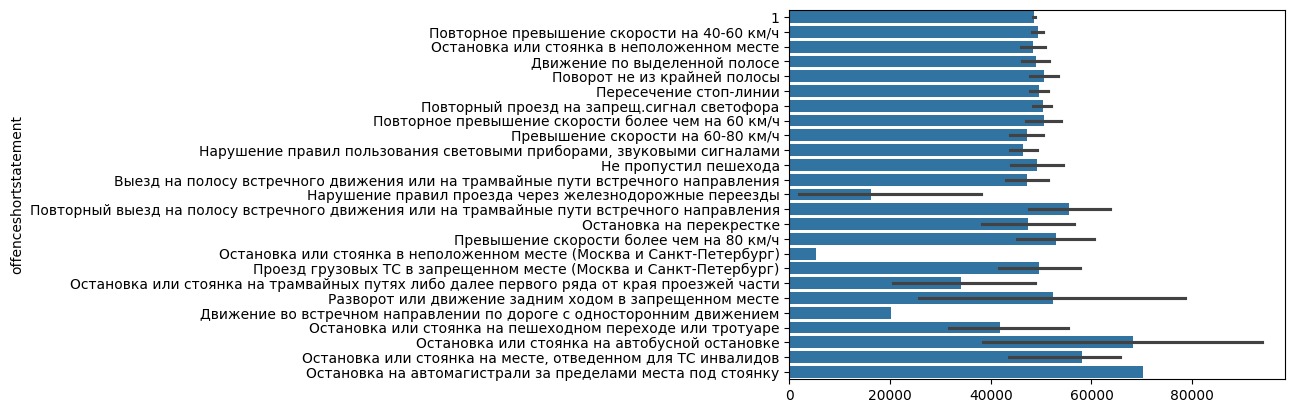

In [23]:
sns.barplot(df["offenceshortstatement"])

<Axes: xlabel='age', ylabel='Count'>

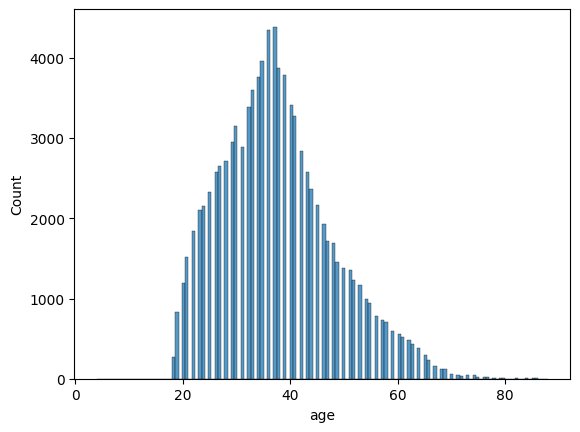

In [40]:
sns.histplot(df["age"])

<Axes: >

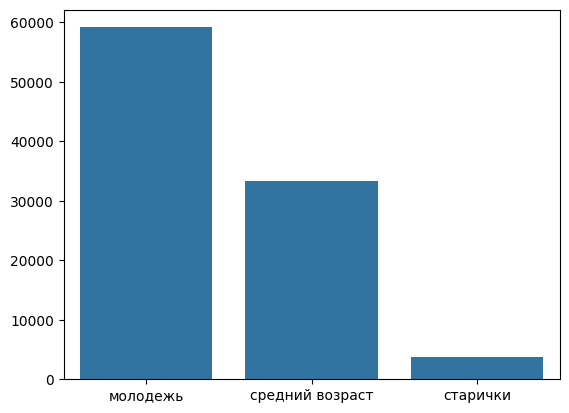

In [51]:
sns.barplot({"молодежь":len(df[(df["age"]>=20) & (df["age"] < 40)]),"средний возраст":len(df[(df["age"]>=40) & (df["age"] < 60)]),"старички":len(df[(df["age"]>=60)])})

<Axes: >

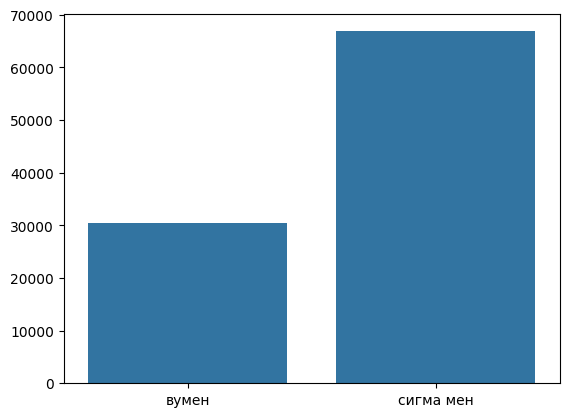

In [52]:
sns.barplot({"вумен":len(df[df["gender_cd"] == 0]),"сигма мен":len(df[df["gender_cd"] == 1])})

<Axes: >

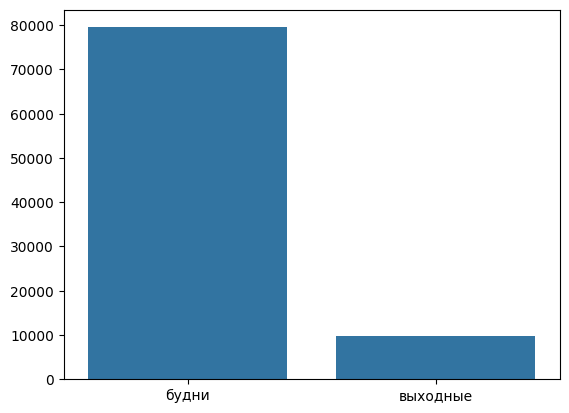

In [54]:
weekends = len(df[df["day_of_week"]=="Субота"]) + len(df[df["day_of_week"]=="Воскресенье"])
not_weekends = len(df[df["day_of_week"]=="Понедельник"]) + len(df[df["day_of_week"]=="Вторник"]) + len(df[df["day_of_week"]=="Среда"]) + len(df[df["day_of_week"]=="Четверг"]) + len(df[df["day_of_week"]=="Пятница"]) 


sns.barplot({"будни":not_weekends,"выходные":weekends})

<Axes: xlabel='education_level_cd', ylabel='Count'>

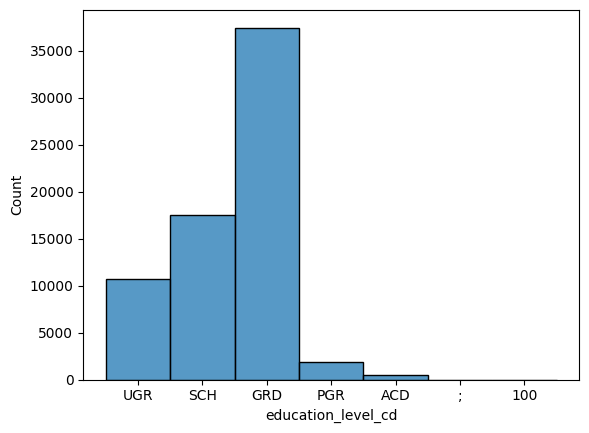

In [16]:
sns.histplot(df["education_level_cd"])

<Axes: >

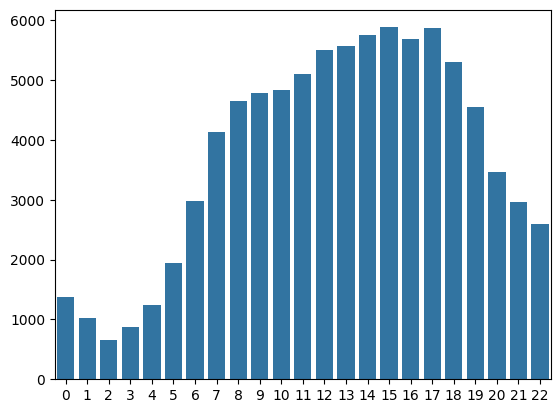

In [14]:
import time
sns.barplot([len(list(filter(lambda x: time.strptime(str(x), '%H:%M:%S').tm_hour == i, df['offencetime'][df["children_cnt"]==0])))
             for i in range(1, 24)])

<Axes: >

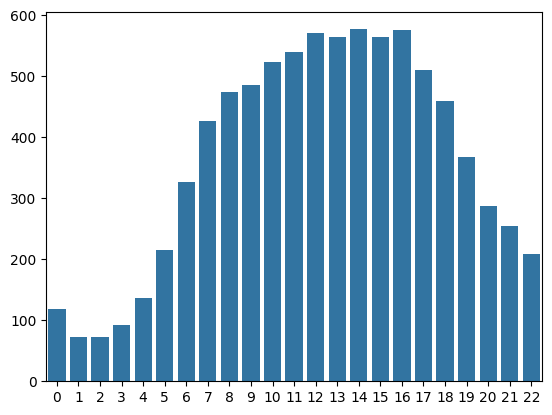

In [4]:
import time
sns.barplot([len(list(filter(lambda x: time.strptime(str(x), '%H:%M:%S').tm_hour == i, df['offencetime'][df["children_cnt"] > 0])))
             for i in range(1, 24)])

<Axes: ylabel='Count'>

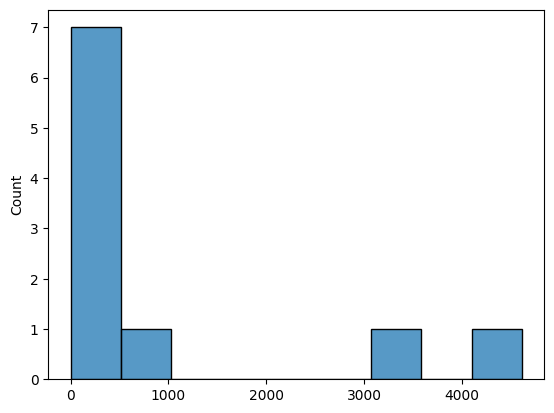

In [99]:
sns.histplot(x=[len(df[(df["children_cnt"] == 1)]),len(df[(df["children_cnt"] == 2)]),len(df[(df["children_cnt"] == 3)]),len(df[(df["children_cnt"] == 4)]),len(df[(df["children_cnt"] == 5)]),len(df[(df["children_cnt"] == 6)]),len(df[(df["children_cnt"] == 7)]),len(df[(df["children_cnt"] == 8)]),len(df[(df["children_cnt"] == 9)]),len(df[(df["children_cnt"] == 10)])])

<Axes: >

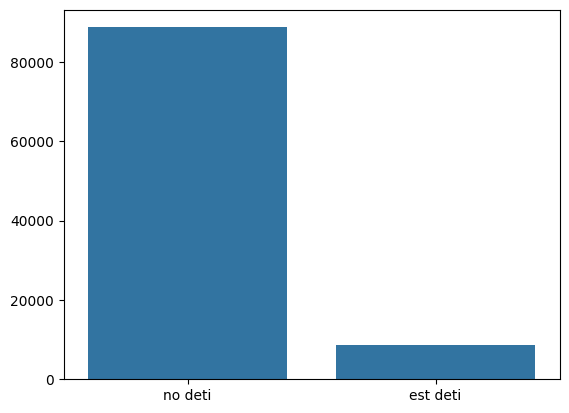

In [70]:
parents = df[df["children_cnt"] > 0]
sns.barplot({"no deti": len(df[df["children_cnt"]==0]),"est deti":len(parents)})

<Axes: >

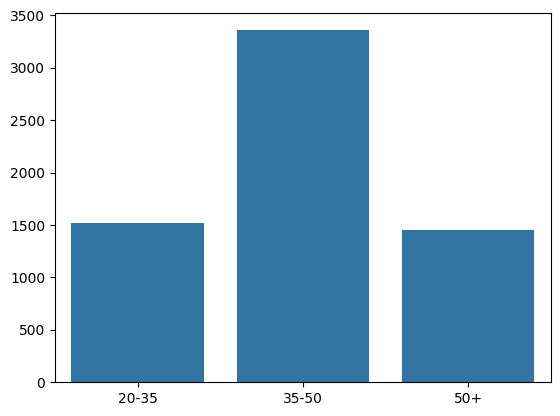

In [74]:
sns.barplot({"20-35":len(df[(df["children_cnt"] > 0) & (df["age"] < 35) & (df["age"] >= 20)]),"35-50":len(df[(df["children_cnt"] > 0) & (df["age"] < 50) & (df["age"] >= 40)]),"50+":len(df[(df["children_cnt"] > 0) & (df["age"] >= 50)])})

<Axes: >

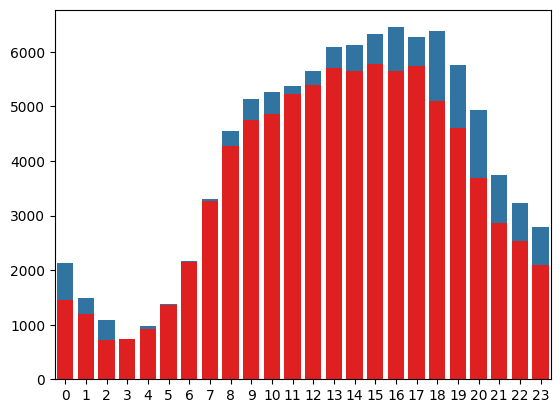

In [64]:
import time
sns.barplot([len(list(filter(lambda x: time.strptime(str(x), '%H:%M:%S').tm_hour == i, df['offencetime'])))
             for i in range(24)])
sns.barplot([len(list(filter(lambda x: time.strptime(str(x), '%H:%M:%S').tm_hour == i, df['offencetime'][df["children_cnt"] > 0]))) * 10
             for i in range(24)],
             color='red')

<Axes: >

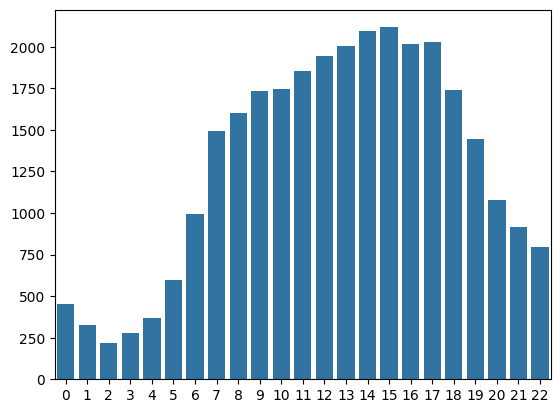

In [46]:
import time
sns.barplot([len(list(filter(lambda x: time.strptime(str(x), '%H:%M:%S').tm_hour == i, df['offencetime'][df["gender_cd"] == 0])))
             for i in range(1, 24)])

In [148]:
df["engine_power"] = df["engine_power"].fillna(250)
df["engine_type"] = df["engine_type"].replace("Бензиновый на бензине",2)
df["engine_type"] = df["engine_type"].replace("3.7 i ",3.7)
df["engine_type"] = df["engine_type"].fillna(2).astype(float)
for i in df["engine_power"]:
    try:
        float(i)
    except:
        print(i)


In [324]:
import statsmodels.api as sm
import datetime as dt
from statsmodels.regression.linear_model import OLS
df["education_level_cd"] = df["education_level_cd"].replace("SCH",0)
df["education_level_cd"] = df["education_level_cd"].replace(";",0)
df["education_level_cd"] = df["education_level_cd"].replace("UGR",1)
df["education_level_cd"] = df["education_level_cd"].replace("GRD",2)
df["education_level_cd"] = df["education_level_cd"].replace("PGR",3)
df["education_level_cd"] = df["education_level_cd"].replace("ACD",4)
df["education_level_cd"] = df["education_level_cd"].replace("MGR",5)
df["education_level_cd"] = df["education_level_cd"].replace("AGR",6)
df["education_level_cd"] = df["education_level_cd"].replace("SPC",7)
df["education_level_cd"] = df["education_level_cd"].fillna(1)
df["education_level_cd"] = df["education_level_cd"].astype(int)

df["marital_status_cd"] = df["marital_status_cd"].replace(";",0)
df["marital_status_cd"] = df["marital_status_cd"].replace("MAR",2)
df["marital_status_cd"] = df["marital_status_cd"].replace("DIV",-2)
df["marital_status_cd"] = df["marital_status_cd"].replace("UNM",-1)
df["marital_status_cd"] = df["marital_status_cd"].replace("WID",-1)
df["marital_status_cd"] = df["marital_status_cd"].replace("CIV",1)
df["marital_status_cd"] = df["marital_status_cd"].replace("DLW",0)
df["marital_status_cd"] = df["marital_status_cd"].astype(int)
df["marital_status_cd"] = df["marital_status_cd"].fillna(0)

df["children_cnt"] = df["children_cnt"].astype(int)
df["person_monthly_income_amt"] = df["person_monthly_income_amt"].fillna(100)
df["person_monthly_income_amt"] = df["person_monthly_income_amt"].astype(int)

df["day_of_week"] = df["day_of_week"].replace("Понедельник",0)
df["day_of_week"] = df["day_of_week"].replace("Вторник",1)
df["day_of_week"] = df["day_of_week"].replace("Среда",2)
df["day_of_week"] = df["day_of_week"].replace("Четверг",3)
df["day_of_week"] = df["day_of_week"].replace("Пятница",4)
df["day_of_week"] = df["day_of_week"].replace("Суббота",5)
df["day_of_week"] = df["day_of_week"].replace("Воскресенье",6)
df["day_of_week"] = df["day_of_week"].fillna(2)

df["hours"] = list(map(int,[str(i).split(':')[0] for i in df["offencetime"]]))

df["public_holiday"] = df["public_holiday"].replace('t',1)
df["public_holiday"] = df["public_holiday"].replace('f',0)

print([len(df[df["day_of_week"] == i]) for i in range(0,7)])

X = np.array(df[["education_level_cd","children_cnt","person_monthly_income_amt","marital_status_cd","hours","public_holiday"]])
Y = np.array(df["day_of_week"])
X = sm.add_constant(X,prepend=False)
model = OLS(Y,X)    
res = model.fit()
print(res.summary())

[18896, 14066, 14192, 15308, 17085, 8010, 9750]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                 1.034e+04
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        07:45:24   Log-Likelihood:            -1.7821e+05
No. Observations:               97307   AIC:                         3.564e+05
Df Residuals:                   97300   BIC:                         3.565e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1  

<Figure size 1000x800 with 0 Axes>

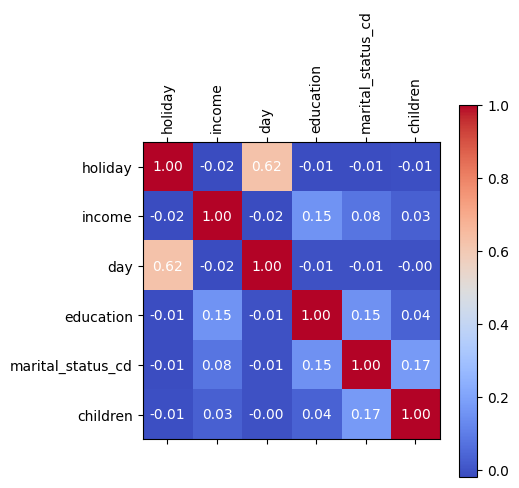

In [328]:
data_to_corr = pd.DataFrame({"holiday":df["public_holiday"],
                             "income": df["person_monthly_income_amt"],
                             "day":df["day_of_week"],
                             "education": df["education_level_cd"],
                             "marital_status_cd": df["marital_status_cd"],
                             "children": df["children_cnt"]})

corr_matrix = data_to_corr.corr()
plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, cmap="coolwarm")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns , rotation="vertical")
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="w")
 
plt.show()

In [8]:
df["offenceprob"] = np.zeros(len(df["children_cnt"]))
for i in range(len(df["children_cnt"])):
    df["offenceprob"][i] = len(df["age"][(df["children_cnt"] == df["children_cnt"][i])])

C:\Users\Админ\AppData\Local\Temp\ipykernel_10984\1023528364.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["offenceprob"][i] = len(df["age"][(df["children_cnt"] == df["children_cnt"][i])])
C:\Users\Админ\AppData\Local\Temp\ipykernel

KeyboardInterrupt: 

<Axes: >

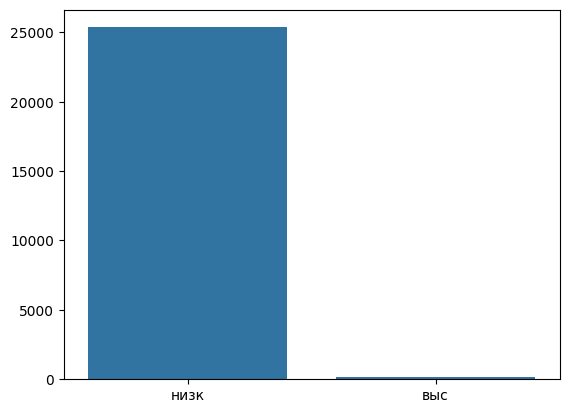

In [326]:
sns.barplot({"низк": len(df[(df["children_cnt"]==0) & (df["education_level_cd"] < 3) & (df["marital_status_cd"] < 0)]),"выс": len(df[(df["children_cnt"] > 0) & (df["education_level_cd"] >= 3) & (df["marital_status_cd"] >= 0)])})

In [297]:
multi_comparison = multi.MultiComparison(df["person_monthly_income_amt"],df["day_of_week"]) 
results = multi_comparison.tukeyhsd() 
print(results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1    -1.97 0.8359  -6.3231  2.3831  False
     0      2   0.6524 0.9994  -3.6897  4.9944  False
     0      3  -0.8774 0.9966  -5.1281  3.3733  False
     0      4  -4.4507 0.0248  -8.5775  -0.324   True
     0      5  -2.8039 0.6913  -8.0157  2.4078  False
     0      6  -8.5546    0.0 -13.4289 -3.6804   True
     1      2   2.6223 0.6413  -2.0285  7.2731  False
     1      3   1.0925 0.9923  -3.4731  5.6582  False
     1      4  -2.4808 0.6539  -6.9312  1.9697  False
     1      5   -0.834 0.9994  -6.3057  4.6377  False
     1      6  -6.5847 0.0031 -11.7359 -1.4335   True
     2      3  -1.5298 0.9563  -6.0848  3.0253  False
     2      4  -5.1031 0.0125  -9.5427 -0.6635   True
     2      5  -3.4563 0.5035  -8.9192  2.0066  False
     2      6   -9.207    0.0 -14.3488 -4.0652   True
     3      4  -3.5733 0.189

In [234]:
multi_comparison = multi.MultiComparison(df["children_cnt"],df["day_of_week"]) 
results = multi_comparison.tukeyhsd() 
print(results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0017 0.9999 -0.0148 0.0182  False
     0      2   0.0067  0.893 -0.0097 0.0231  False
     0      3   0.0029 0.9985 -0.0132  0.019  False
     0      4   0.0013    1.0 -0.0143  0.017  False
     0      5  -0.0117 0.5791 -0.0315  0.008  False
     0      6  -0.0031  0.999 -0.0215 0.0154  False
     1      2    0.005 0.9806 -0.0126 0.0226  False
     1      3   0.0012    1.0 -0.0161 0.0185  False
     1      4  -0.0003    1.0 -0.0172 0.0165  False
     1      5  -0.0134 0.4726 -0.0341 0.0073  False
     1      6  -0.0048 0.9914 -0.0243 0.0147  False
     2      3  -0.0038 0.9948 -0.0211 0.0134  False
     2      4  -0.0054 0.9656 -0.0222 0.0114  False
     2      5  -0.0184 0.1168 -0.0391 0.0022  False
     2      6  -0.0098 0.7552 -0.0292 0.0097  False
     3      4  -0.0015    1.0  -0.018 0.0149  False
     3      

In [235]:
multi_comparison = multi.MultiComparison(df["marital_status_cd"],df["day_of_week"]) 
results = multi_comparison.tukeyhsd() 
print(results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0231 0.6419 -0.0179   0.064  False
     0      2   0.0123 0.9747 -0.0286  0.0531  False
     0      3   0.0009    1.0 -0.0391  0.0409  False
     0      4   0.0078 0.9971  -0.031  0.0466  False
     0      5  -0.0321 0.4613 -0.0811   0.017  False
     0      6  -0.0191 0.8832 -0.0649  0.0267  False
     1      2  -0.0108 0.9909 -0.0545  0.0329  False
     1      3  -0.0222 0.7313 -0.0651  0.0208  False
     1      4  -0.0153 0.9348 -0.0571  0.0266  False
     1      5  -0.0551 0.0265 -0.1066 -0.0037   True
     1      6  -0.0422 0.1363 -0.0906  0.0063  False
     2      3  -0.0114 0.9866 -0.0542  0.0315  False
     2      4  -0.0045 0.9999 -0.0463  0.0372  False
     2      5  -0.0443 0.1436 -0.0957   0.007  False
     2      6  -0.0314 0.4713 -0.0797   0.017  False
     3      4   0.0069 0.9989  -0.034  0.0478 

In [236]:
multi_comparison = multi.MultiComparison(df["education_level_cd"],df["day_of_week"]) 
results = multi_comparison.tukeyhsd() 
print(results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0145 0.7201 -0.0133  0.0423  False
     0      2   0.0262 0.0786 -0.0015  0.0539  False
     0      3   0.0121 0.8435  -0.015  0.0393  False
     0      4  -0.0013    1.0 -0.0276  0.0251  False
     0      5  -0.0194 0.6039 -0.0526  0.0139  False
     0      6  -0.0049 0.9992  -0.036  0.0262  False
     1      2   0.0117 0.9096  -0.018  0.0413  False
     1      3  -0.0024    1.0 -0.0315  0.0267  False
     1      4  -0.0158 0.6583 -0.0442  0.0126  False
     1      5  -0.0339 0.0638 -0.0688   0.001  False
     1      6  -0.0194 0.5867 -0.0523  0.0134  False
     2      3   -0.014 0.7887 -0.0431   0.015  False
     2      4  -0.0274 0.0652 -0.0558  0.0009  False
     2      5  -0.0456 0.0022 -0.0804 -0.0107   True
     2      6  -0.0311 0.0767 -0.0639  0.0017  False
     3      4  -0.0134 0.7905 -0.0411  0.0144 

<Axes: ylabel='person_monthly_income_amt'>

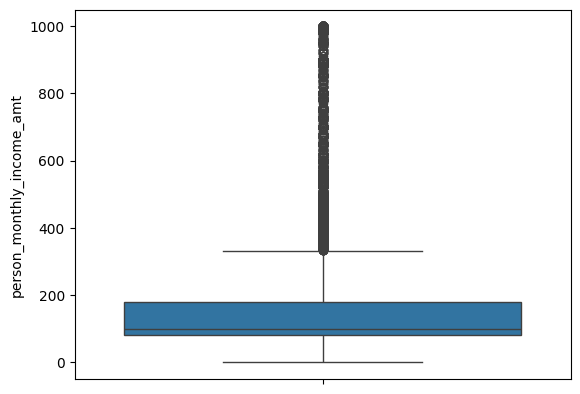

In [252]:
q = "person_monthly_income_amt"
sns.boxplot(df[q][df[q] < 1000])

In [302]:
#зарплатная зависимость 
q = ""
print(stats.ttest_ind(df[q],df["day_of_week"]))
print(stats.levene(df[q],df["day_of_week"]))
print(stats.f_oneway(df[q],df["day_of_week"]))

TtestResult(statistic=np.float64(345.24306947474673), pvalue=np.float64(0.0), df=np.float64(194612.0))
LeveneResult(statistic=np.float64(38369.34151311954), pvalue=np.float64(0.0))
F_onewayResult(statistic=np.float64(119192.77702034477), pvalue=np.float64(0.0))
